In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# file location path is defined.
path = r'C:\Users\User\02.25 Instacart Basket Analysis'

In [6]:
# The ords_prods_merge_3 DataFrame is imported
ords_prods_merge_3 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge_3.pkl'))

In [8]:
# The shape of the DataFrame is revised
ords_prods_merge_3.shape

(32404859, 24)

In [10]:
# A general overview of the DataFrame is performed to check for irregularities.
ords_prods_merge_3.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,_merge,busiest_days,busiest_period_of_day,max_order,loyalty_flag,max_price,mean_price,spending_type,median_frequency,frequent_customers
0,2539329,1,1,2,8,NaN,True,196,1,0,...,both,Regularly busy,Average orders,10,New customer,6.367797,6.367797,Low spender,20.5,Non-frequent customer
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,both,Regularly busy,Average orders,10,New customer,6.367797,6.367797,Low spender,20.5,Non-frequent customer
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,both,Regularly busy,Average orders,10,New customer,6.367797,6.367797,Low spender,20.5,Non-frequent customer
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,both,Regularly busy,Average orders,10,New customer,6.367797,6.367797,Low spender,20.5,Non-frequent customer
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,both,Regularly busy,Average orders,10,New customer,6.367797,6.367797,Low spender,20.5,Non-frequent customer


<Axes: xlabel='order_dow'>

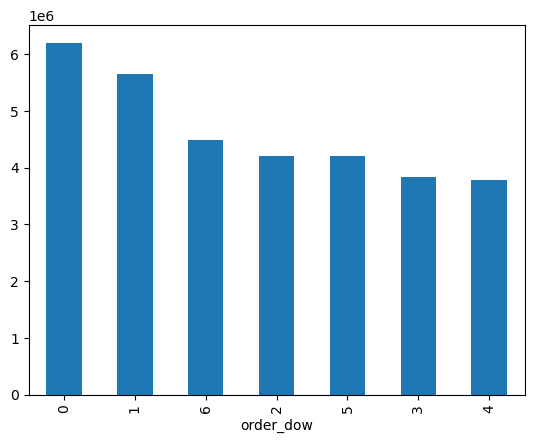

In [16]:
# Bar Chart 
ords_prods_merge_3['order_dow'].value_counts().plot.bar()

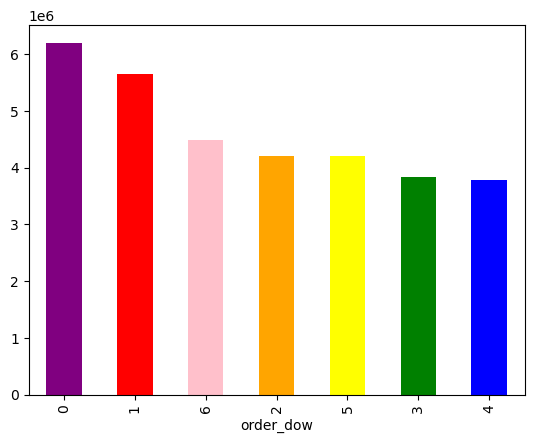

In [20]:
# The bar chart has been saved within the bar object, and will be able to access it any time by calling bar.figure
bar = ords_prods_merge_3['order_dow'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [24]:
# The next step is to export it outside of Jupyter in the form of an image file. This can be done via the figure.savefig() function:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

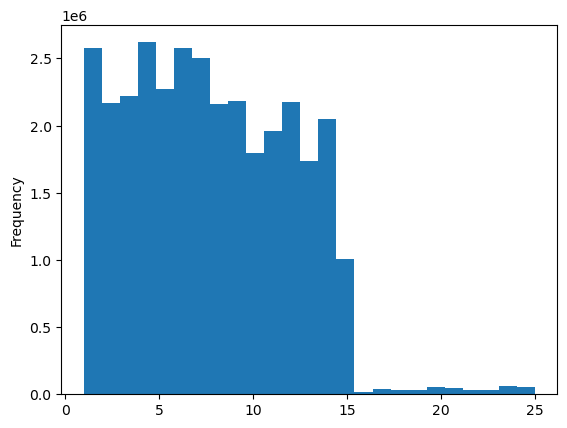

In [28]:
# a histogram of the “prices” column.
ords_prods_merge_3['prices'].plot.hist(bins = 25)

<Axes: xlabel='prices', ylabel='prices'>

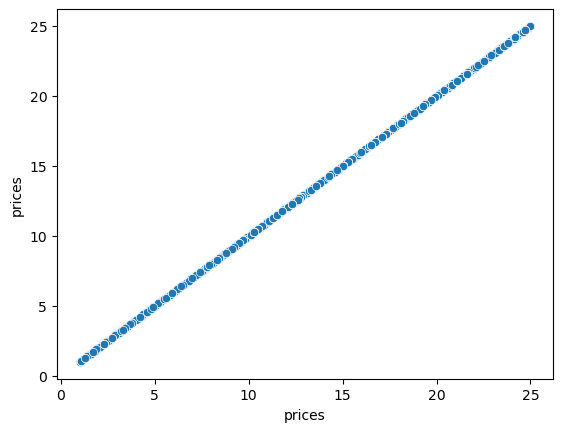

In [32]:
# A scatterplot can be created via the following code:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge_3)

In [38]:
ords_prods_merge_3.loc[ords_prods_merge_3['prices'] > 100]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,_merge,busiest_days,busiest_period_of_day,max_order,loyalty_flag,max_price,mean_price,spending_type,median_frequency,frequent_customers


<Axes: ylabel='Frequency'>

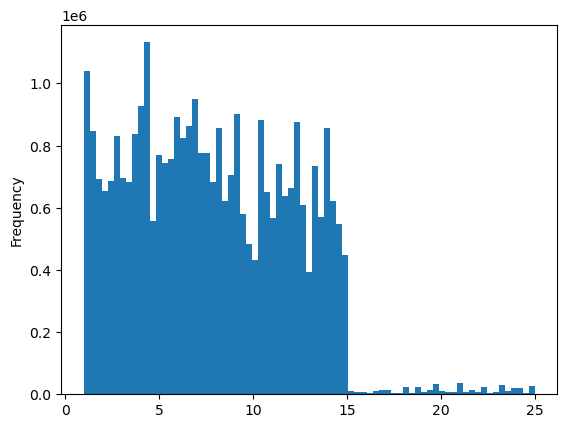

In [40]:
# a histogram of the “prices” column. Increasing the number of bins will allow to see more variety in the histogram.
ords_prods_merge_3['prices'].plot.hist(bins = 75)

In [46]:
# Set the seed for the random number generator.
# Create 32,404,859 random numbers (the length of your ords_prods_merge dataframe) ranging between 0 and 1.
# Code a logical test comparing each of those numbers to a value of 0.7 (either less than or greater than 0.7).
# Store the results of the test in a new list, dev, in the form of boolean values (True and False).
np.random.seed(4)

# Create a list holding True/False values to the test np.random.rant() <= 0.7
dev = np.random.rand(len(ords_prods_merge_3)) <= 0.7

In [44]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [52]:
# The two dataframes above, big and small, are the samples you’ll create from your ords_prods_merge dataframe. 
# What you want to do is store 70 percent of your dataframe in the big sample and 30 percent of your dataframe in the small sample. 
# You’ll do this according to the values in your dev list. For every value in the list that’s True, 
# the corresponding row in your ords_prods_merge dataframe will be stored in the big sample. 
# For every value in the list that’s False, the corresponding row in your dataframe will be stored in the small sample. 
# Since True and False were determined by whether or not the random number was less than or greater than 0.7, 
# this means that 70 percent of the rows should logically be sorted into big and 30 percent of the rows should logically be sorted into small. 
# The tilde you see in the second line negates the argument, in other words, it stores everything that’s not dev, or False.

# Store 70% of the sdample in the dataframe big
big = ords_prods_merge_3[dev]

# Store 30% of the sample in the dataframe small
small = ords_prods_merge_3[~dev]

In [54]:
len(ords_prods_merge_3)

32404859

In [56]:
# Test to see if the sum of the two samples are equal to the lenght of the full data frame
len(big) + len(small)

32404859

In [58]:
df_2 = small[['order_dow','prices']]

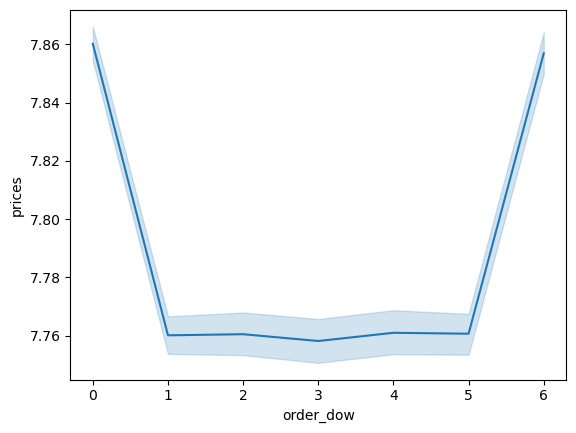

In [62]:
line = sns.lineplot(data = df_2, x = 'order_dow',y = 'prices')